### Biblioteki używane w rozwiązaniu zadań

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec
from scipy.integrate import trapz, simps
from scipy.special import roots_legendre

# Zadanie 1

Celem zadania jest obliczenie całki $\int_0^1\frac{4}{1+x^2}dx$ przy wykorzystaniu kwadratur adaptacyjnych: **trapezów** i **Gaussa-Kronroda**, wiedząc, że jej rzeczywista wartość wynosi $\pi$. Skorzystamy z pomocniczej funkcji bibliotecznej *scipy.integrate.quad_vec*.

In [2]:
def f(x):
    return 4 / (1 + x ** 2)

In [3]:
# Definiowanie granic całkowania
a = 0
b = 1

# Definiowanie zakresu testowanych wartości
COMPLEX_START = 0
COMPLEX_END = 26

ADAPTIVE_START = 0
ADAPTIVE_END = 15

GL_START = 1
GL_END = 14

Poniżej definiujemy funkcje obliczające powyższą całkę, korzystając z adaptacyjnych kwadratur: trapezów i Gaussa-Kronroda. Wykorzystujemy funkcję biblioteczną, podając odpowiedni argument.

In [4]:
# Funkcja obliczająca całkę metodą adaptacyjną trapezów
# zwracamy obliczoną wartość i liczbę ewaluacji funkcji 
def trapezoidal_adaptive(f, tolerance):
    value, error, info = quad_vec(f, a, b, epsabs = tolerance, quadrature = 'trapezoid', full_output = True)
    return value, info.neval

In [5]:
# Funkcja obliczająca całkę metodą adaptacyjną Gaussa-Kronroda
# zwracamy obliczoną wartość i liczbę ewaluacji funkcji 
def Gauss_Kronrod_adaptive(f, tolerance):
    value, error, info = quad_vec(f, a, b, epsabs = tolerance, quadrature = 'gk21', full_output = True)
    return value, info.neval

Na przedziale całkowania ustalamy tolerancję - wartość dopuszczalnego błędu, przyjmując wartości $10^{-i}$ dla $i=0,1,...,14$. W zależności od przyjętej tolerancji funkcja automatycznie dobiera liczbę ewaluacji funkcji podcałkowej, którą odczytujemy. Dla każdej z metod obliczamy wartość bezwzględną błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej.

In [6]:
def relative_error(approx_val, actual_val = np.pi):
    return np.abs((approx_val - actual_val) / actual_val) 

In [7]:
data = []

# Obliczanie wartości całki i liczby ewaluacji dla różnych wartości `i` oraz dodawanie ich do listy
for i in range(ADAPTIVE_START, ADAPTIVE_END):
    tolerance = 10 ** (-i)
    trapezoidal_value, trapezoidal_evals = trapezoidal_adaptive(f, tolerance)
    gauss_kronrod_value, gauss_kronrod_evals = Gauss_Kronrod_adaptive(f, tolerance)
    data.append({"-i": (-i), "Trapezoidal Quadrature"   : trapezoidal_value, 
                             "Trapezoidal Evaluations"  : trapezoidal_evals, 
                             "Gauss-Kronrod Quadrature" : gauss_kronrod_value,
                             "Gauss-Kronrod Evaluations": gauss_kronrod_evals})

Najpierw przedstawiamy wyniki dla każdej z metod na osobnych wykresach, używając odpowiedniej skali na osiach. 

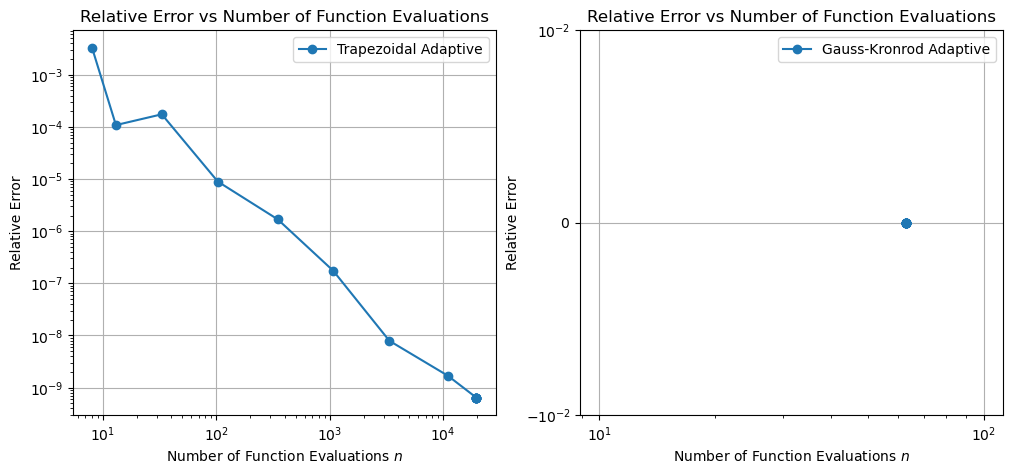

In [8]:
_, ax = plt.subplots(1, 2, figsize = (12, 5))

trapezoidal_aderrors = np.array([relative_error(dict["Trapezoidal Quadrature"]) for dict in data])
trapezoidal_adevals  = np.array([dict["Trapezoidal Evaluations"] for dict in data])

gauss_kronrod_errors = np.array([relative_error(dict["Gauss-Kronrod Quadrature"]) for dict in data])
gauss_kronrod_evals  = np.array([dict["Gauss-Kronrod Evaluations"] for dict in data])

ax[0].plot(trapezoidal_adevals, trapezoidal_aderrors, label = "Trapezoidal Adaptive", marker = 'o')
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlabel(r"Number of Function Evaluations $n$")
ax[0].set_ylabel("Relative Error")
ax[0].set_title("Relative Error vs Number of Function Evaluations")
ax[0].legend()
ax[0].grid()

ax[1].plot(gauss_kronrod_evals, gauss_kronrod_errors, label = "Gauss-Kronrod Adaptive", marker = 'o')
ax[1].set_yscale("symlog") # z powodu wartości 0
ax[1].set_xscale("log")
ax[1].set_xlabel(r"Number of Function Evaluations $n$")
ax[1].set_ylabel("Relative Error")
ax[1].set_ylim(bottom = -10 ** (-2), top = 10 ** (-2))
ax[1].set_title("Relative Error vs Number of Function Evaluations")
ax[1].legend()
ax[1].grid()

Okazuje się, że dla metody **Gaussa-Kronroda** niezależnie od przyjętej tolerancji, następowała stała liczba ewaluacji funkcji, ponadto błąd wynosił dokładnie 0. Stąd na osi $Y$ na drugim wykresie przyjęliśmy skalę logarytmiczną, która przy wartościach blisko 0 jest liniowa (opcja `symlog`).  

### Kopia przydatnych funkcji z poprzedniego laboratorium

In [9]:
#kwadratury złożone
def trapezoidal_rule(f, a, b, m):
    x = np.linspace(a, b, m)
    y = f(x)
    return trapz(y, x)

def simpsons_rule(f, a, b, m):
    x = np.linspace(a, b, m)
    y = f(x)
    return simps(y, x)

def midpoint_rule(f, a, b, m):
    h = (b - a) / m
    nodes = np.linspace(a + h / 2, b - h / 2, m)
    return h * np.sum(f(nodes))

def gauss_legendre(A, roots, f):
    transform_roots = 0.5 + 0.5 * roots
    return 0.5 * A @ f(transform_roots)

Nieco zmodyfikowany kod z poprzedniego laboratorium, z uwzględnieniem metod z tego laboratorium:

In [10]:
def test(f, actual_val = np.pi):
    errors = []
    
    for m in range(COMPLEX_START, COMPLEX_END):
        midpoint_value =    relative_error(midpoint_rule(f, a, b, 2 ** m + 1), actual_val)
        trapezoidal_value = relative_error(trapezoidal_rule(f, a, b, 2 ** m + 1), actual_val)
        simpsons_value =    relative_error(simpsons_rule(f, a, b, 2 ** m + 1), actual_val)
        errors.append({m: m, "Midpoint Rule"   : midpoint_value, 
                            "Trapezoidal Rule": trapezoidal_value, 
                            "Simpson's Rule"  : simpsons_value})

    for i in range(ADAPTIVE_START, ADAPTIVE_END):
        tolerance = 10 ** -i
        trapezoidal_value, trapezoidal_evals = trapezoidal_adaptive(f, tolerance)
        gauss_kronrod_value, gauss_kronrod_evals = Gauss_Kronrod_adaptive(f, tolerance)
        errors[i]["Trapezoidal Quadrature"] =  relative_error(trapezoidal_value, actual_val)
        errors[i]["Trapezoidal Evaluations" ] =  trapezoidal_evals
        errors[i]["Gauss-Kronrod Quadrature"] =  relative_error(gauss_kronrod_value, actual_val)
        errors[i]["Gauss-Kronrod Evaluations"] = gauss_kronrod_evals
        
    for m in range(GL_START, GL_END):
        roots_i, A_i = roots_legendre(2 ** m)
        errors[m]["Gauss Legendre"] = relative_error(gauss_legendre(A_i, roots_i, f), actual_val)
    
    return errors

In [11]:
errors = test(f)

### Wspólny wykres

Teraz przedstawmy uzyskane wyniki z tego zadania wraz z wynikami z poprzedniego laboratorium na wspólnym wykresie, używając skali logarytmicznej na obu osiach. Z tego powodu nie będzie widocznego punktu reprezentującego metody Gaussa-Kronroda. Jednakże, przy wybraniu argumentu *symlog* w skali osi $Y$, wykres staje się o wiele mniej czytelny, dlatego postanowiliśmy postąpić w taki sposób.

In [12]:
def plot(errors, function_name, ylim = None):
    midpoint_errors    = np.array([dict["Midpoint Rule"] for dict in errors])
    trapezoidal_errors = np.array([dict["Trapezoidal Rule"] for dict in errors])
    simpsons_errors    = np.array([dict["Simpson's Rule"] for dict in errors])
    gl_errors          = np.array([dict["Gauss Legendre"] for i, dict in enumerate(errors) if GL_START <= i < GL_END])
    
    evaluations = np.array([2 ** i + 2 for i, _ in enumerate(errors)])
    gl_evals    = np.array([2 ** i + 2 for i, _ in enumerate(errors) if GL_START <= i < GL_END])
    
    trapezoidal_aderrors = np.array([dict["Trapezoidal Quadrature"] for i, dict in enumerate(errors) if ADAPTIVE_START <= i < ADAPTIVE_END])
    trapezoidal_adevals  = np.array([dict["Trapezoidal Evaluations"] for i, dict in enumerate(errors) if ADAPTIVE_START <= i  < ADAPTIVE_END])
    gk_errors            = np.array([dict["Gauss-Kronrod Quadrature"] for i, dict in enumerate(errors) if ADAPTIVE_START <= i < ADAPTIVE_END])
    gk_evaluations       = np.array([dict["Gauss-Kronrod Evaluations"] for i, dict in enumerate(errors) if ADAPTIVE_START <= i < ADAPTIVE_END])

    plt.figure(figsize = (10, 6))

    plt.plot(evaluations, midpoint_errors, label = "Midpoint Rule", marker = 'o')
    plt.plot(evaluations, trapezoidal_errors, label = "Trapezoidal Rule", linestyle = "dotted", marker = 'o')
    plt.plot(evaluations, simpsons_errors, label = "Simpson's Rule", marker = 'o')
    plt.plot(gl_evals, gl_errors, label = "Gauss-Legendre", linestyle = "dotted", marker = 'o')
    plt.plot(trapezoidal_adevals, trapezoidal_aderrors, label = "Trapezoidal Adaptive", marker = 'o')
    plt.plot(gk_evaluations, gk_errors, label = "Gauss-Kronrod Adaptive", linestyle = "dotted", marker = 'o')

    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Number of Function Evaluations")
    plt.ylabel("Relative Error")
    
    plt.title("Relative Error vs. Number of Function Evaluations for function " + function_name)
    plt.legend()
    plt.grid(True)
    plt.ylim(ylim)
    plt.show()

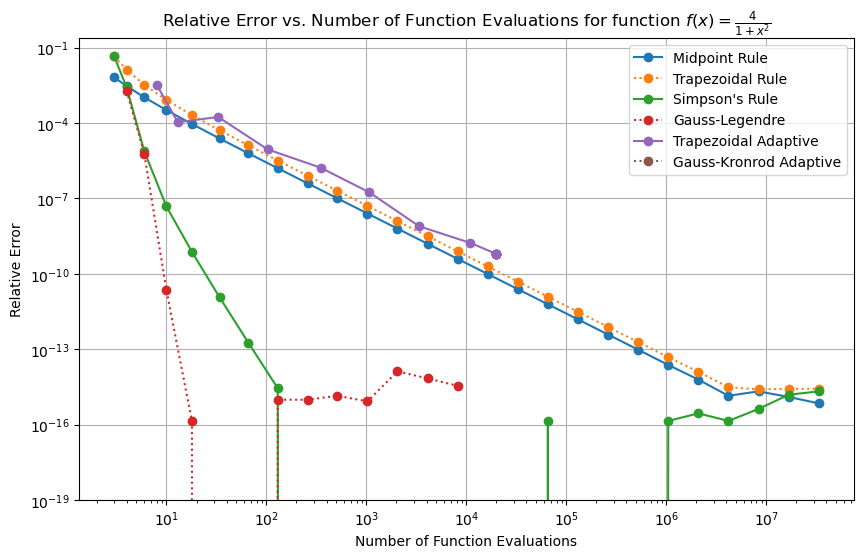

In [13]:
plot(errors, r"$f(x)=\frac{4}{1+x^2}$", 10 ** -19)

# Zadanie 2

W zadaniu 2 powtarzamy obliczenia z zadania 1 oraz poprzedniego laboratorium dla dwóch kolejnych całek:
\begin{gather}
    \int_0^1\sqrt{x}\textrm{log}x\textrm{d}x \\
	\int_0^1\left(\frac{1}{(x-0.3)^2+a}+\frac{1}{(x-0.9)^2+b}-6\right)\textrm{d}x
\end{gather}

Naszymi funkcjami podcałkowymi stają się zatem $f_1(x)=\sqrt{x}\textrm{log}x$ oraz $f_2(x)=\frac{1}{(x-0.3)^2+a}+\frac{1}{(x-0.9)^2+b}-6$. Przyjmujemy $a=0.001$ i $b=0.004$.

In [14]:
SMALL_CONST = 10 ** -13 # bo logarytm nie jest określony w zerze

def f1(x):
    return np.sqrt(x + SMALL_CONST) * np.log(x + SMALL_CONST)

def f2(x):
    return 1 / ((x - 0.3) ** 2 + 0.001) + 1 / ((x - 0.9) ** 2 + 0.004) - 6

Wartość pierwszej całki wynosi $-\frac{4}{9}$, z kolei korzystając z odpowiedniej tożsamości, rzeczywistą wartość dla całki drugiej znajdujemy ze wzoru: $\int_0^1f_2(x)\textrm{d}x=\frac{1}{\sqrt{0.001}}\left(\textrm{arctg}\frac{0.7}{\sqrt{0.001}}+\textrm{arctg}\frac{0.3}{\sqrt{0.001}}\right) + \frac{1}{\sqrt{0.004}}\left(\textrm{arctg}\frac{0.1}{\sqrt{0.004}}+\textrm{arctg}\frac{0.9}{\sqrt{0.004}}\right) - 6$

z podstawionymi wartościami $a,b$.

In [15]:
a_sqrt = np.sqrt(0.001)
b_sqrt = np.sqrt(0.004)

actual_val_f1 = -4 / 9
actual_val_f2 = 1 / a_sqrt * (np.arctan(0.7 / a_sqrt) + np.arctan(0.3 / a_sqrt)) + \
                1 / b_sqrt * (np.arctan(0.1 / b_sqrt) + np.arctan(0.9 / b_sqrt)) - 6

Przystępujemy do obliczenia błędów względnych wszystkich metod dla obu funkcji i przedstawienia ich na wykresach.

In [16]:
errors_f1 = test(f1, actual_val_f1)
errors_f2 = test(f2, actual_val_f2)

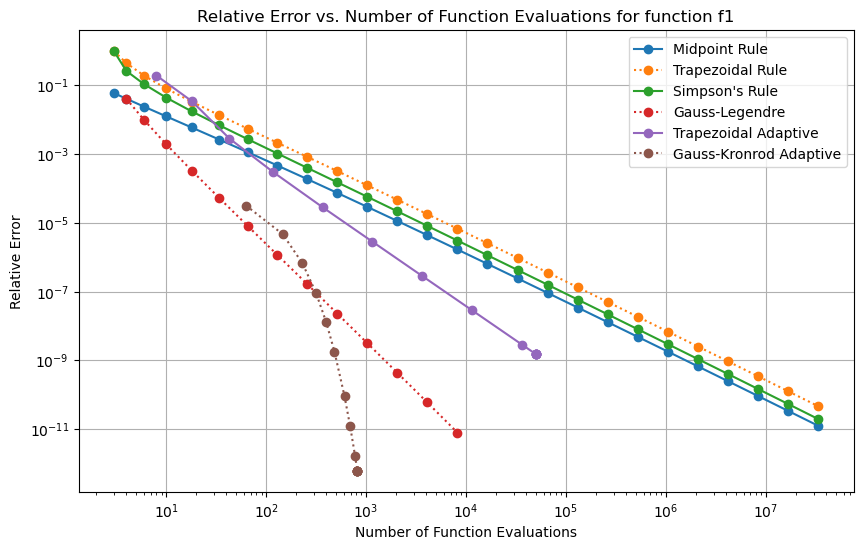

In [17]:
plot(errors_f1, "f1")

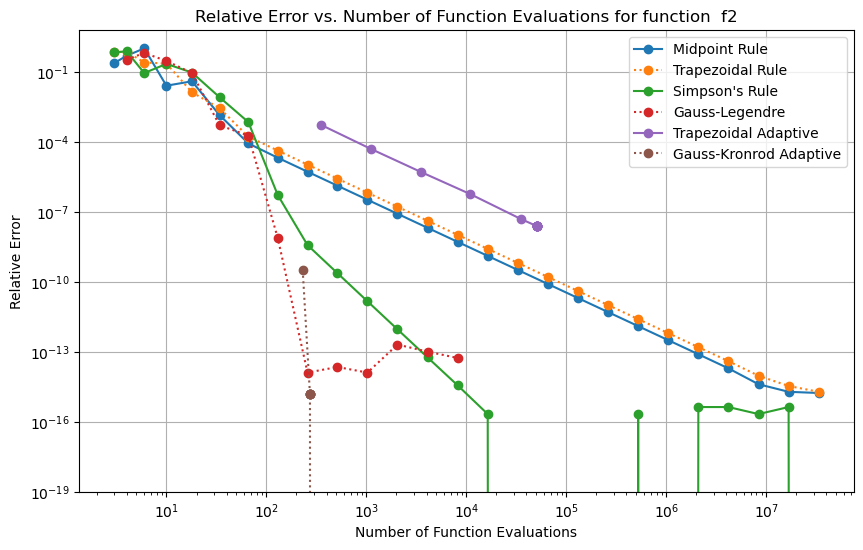

In [18]:
plot(errors_f2, " f2", 10 ** -19)